## 2019.7.8 
### 1. 统计学习方法概论

一般的H(x)为n次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ 使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# 目标函数

def real_fun(x):
    return np.sin(2*np.pi*x)

# 多项式

def fit_func(p, x):
    f = np.poly1d(p) #生成一个多项式
    #print("多项式　")
    #print(f)
    return f(x)

#残差函数

def residuals_func(p, x, y):
    ret = fit_func(p, x) - y #计算残差
    return ret    

In [82]:
#1.准备数据
x = np.linspace(0, 1, 10)# 散点
x_points = np.linspace(0, 1, 1000)# 实点

#2.加上正则化项的数据
y_ = real_fun(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

#3.拟合数据
def fitting(M = 0):
    """
    M 为缺省参数下的值
    """
    p_init = np.random.rand(M+1)
    print(p_init)
    
    #最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))　# 参数p_init 为实际p参数, 函数其他参数被放置到args中
    print("Fitting Parameters:", p_lsq[0])
          
    #可视化
    plt.plot(x_points, real_fun(x_points),label="real")
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label = "fited curver")
    plt.plot(x, y , 'bo', label = "noise")
    plt.legend()
   ## plt.savefig("ff")
    return p_lsq

[ 0.08338937]
Fitting Parameters: [-0.00138584]


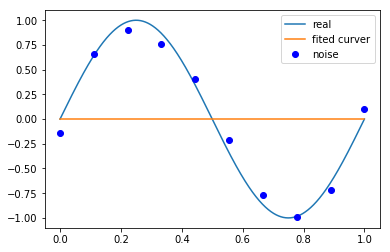

In [83]:
p_lsq_0 = fitting(M = 0)
plt.savefig("欠拟合（效果最差）")

[ 0.32856553  0.6156135 ]
Fitting Parameters: [-1.2080288   0.60262856]


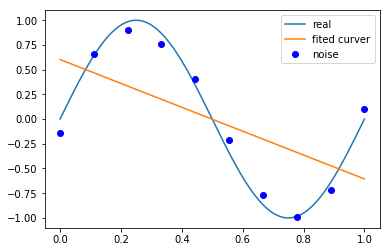

In [84]:
# M = 1
p_lsq_1 = fitting(M = 1)
plt.savefig("欠拟合（效果差）")

[ 0.14933109  0.72280253  0.47450826  0.98548848]
Fitting Parameters: [ 21.28727532 -32.22402083  11.20042957  -0.17665126]


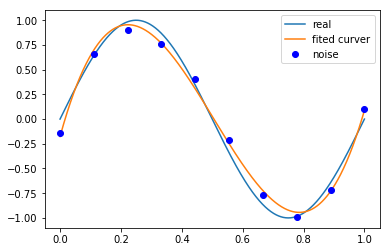

In [85]:
# M = 3
p_lsq_2 = fitting(M = 3)
plt.savefig("拟合")

[ 0.88062501  0.50099868  0.9569478   0.47384835  0.86220176  0.78225938
  0.95153679  0.3205565   0.19080151  0.57491394]
Fitting Parameters: [ -4.92791806e+03   2.30864427e+04  -4.54732262e+04   4.87963683e+04
  -3.08791751e+04   1.16492320e+04  -2.50231242e+03   2.52862903e+02
  -2.03449722e+00  -1.38597110e-01]


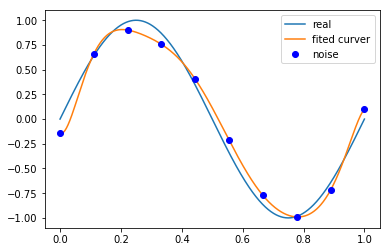

In [86]:
# M = 9 
p_lsq_3 = fitting(M = 9)
plt.savefig("过拟合")

### 正则化

当Ｍ=9时，此时显示过拟合，可以增加正则化项来消除过拟合现象

In [108]:
#预先设置正则化系数
regularization = 10

def resi_regular(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p)))

    return ret

In [109]:
# 正则化＋最小二乘法
p_init = np.random.rand(9+1)#保证生成多项式的系数一致

p_lsq_regular = leastsq(resi_regular, p_init, args=(x, y))

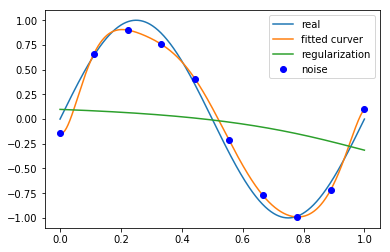

In [111]:
plt.plot(x_points, real_fun(x_points), label = "real")
plt.plot(x_points, fit_func(p_lsq_3[0], x_points), label = "fitted curver")
plt.plot(x_points, fit_func(p_lsq_regular[0], x_points), label= "regularization")
plt.plot(x, y ,"bo", label = "noise")
plt.legend()
plt.savefig("过度正则化")
